In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from keras.utils.data_utils import Sequence
import sys
from PIL import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2   
import os
import random
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [45]:
img_width, img_height = 224, 224
IMG_SIZE = 224

In [46]:
CATEGORIES =['no_pneumonia','pneumonia']
train_data = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\train'
test_data = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\test'
val_data = r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\val'

def pre_pro(DIRECTORY):

  data = []
  #pre-processing
  for category in CATEGORIES:
        folder = os.path.join(DIRECTORY, category)
        label = CATEGORIES.index(category)
        for img in tqdm(os.listdir(folder)):
            try:
                img_path = os.path.join(folder, img)
                #print(img_path)
                #img_arr = cv2.imread(img_path)
                #img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.imread(img_path)
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            except Exception as e:
                 pass
  len(data)

  random.shuffle(data)

  X = []
  Y = []
    
  for features, labels in data:
   X.append(features)
   Y.append(labels)
    

  #X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  X = np.array(X)
  y = np.array(Y)
  return X, y

In [52]:
X_train,y_train = pre_pro(r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\train')
X_test,y_test = pre_pro(r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\test')
X_val,y_val= pre_pro(r'C:\Users\Computing\Downloads\data-task1\data-task1\data-task1\val')

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 89.15it/s]


In [53]:
pickle.dump(X_train, open(r'C:\Users\Computing\Downloads\X_train.pkl', 'wb'))
pickle.dump(y_train, open(r'C:\Users\Computing\Downloads\y_train.pkl', 'wb'))
pickle.dump(X_test, open(r'C:\Users\Computing\Downloads\X_test.pkl', 'wb'))
pickle.dump(y_test, open(r'C:\Users\Computing\Downloads\Y_test.pkl', 'wb'))
pickle.dump(X_val, open(r'C:\Users\Computing\Downloads\X_val.pkl', 'wb'))
pickle.dump(y_val, open(r'C:\Users\Computing\Downloads\y_val.pkl', 'wb'))

In [47]:
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

X_train = pickle.load(open(r'C:\Users\Computing\Downloads\X_train.pkl','rb'))
y_train = pickle.load(open(r'C:\Users\Computing\Downloads\y_train.pkl','rb'))
X_test = pickle.load(open(r'C:\Users\Computing\Downloads\X_test.pkl','rb'))
y_test = pickle.load(open(r'C:\Users\Computing\Downloads\X_test.pkl','rb'))
X_val = pickle.load(open(r'C:\Users\Computing\Downloads\X_val.pkl','rb'))
y_val = pickle.load(open(r'C:\Users\Computing\Downloads\y_val.pkl','rb'))

In [54]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/244,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rotation_range=10,
        rescale = 1/244,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])

val_datagen = ImageDataGenerator(rescale = 1/244,rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')


Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [49]:
X_train = X_train/ 255;
X_test = X_test/ 255;
X_val = X_val/ 255;



from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/244,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rotation_range=10,
        rescale = 1/244,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])

val_datagen = ImageDataGenerator(rescale = 1/244,rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])



train_datagen.fit(X_train)
test_datagen.fit(X_test)
val_datagen.fit(X_val)

In [55]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)

In [56]:
X_train.shape

(3000, 224, 224, 3)

In [57]:
y_train.shape

(3000, 2)

In [74]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(input_shape =(224,224,3) ,weights='imagenet', include_top=False)

for layer in model.layers:
    layer.trainable = False

result = model.output

from keras.layers import BatchNormalization
result = BatchNormalization()(result)

result = Flatten()(result)
# add a fully-connected layer

result = Dense(256, activation='relu')(result)
result = Dropout(0.5)(result)

result = Dense(128, activation='relu')(result)
result = Dropout(0.5)(result)


# and a fully connected output/classification layer

predictions = Dense(2, activation='sigmoid')(result)
res_model = Model(inputs=model.input, outputs=predictions)

from tensorflow.keras.optimizers import SGD
import tensorflow as tf
sgd = tf.optimizers.SGD(lr=1e-4, momentum=0.9)
res_model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
import tensorflow as tf
history = res_model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)


Epoch 1/20
94/94 [==============================] - 119s 1s/step - loss: 0.7139 - accuracy: 0.7273 - val_loss: 0.4615 - val_accuracy: 0.7900
Epoch 2/20
94/94 [==============================] - 118s 1s/step - loss: 0.4647 - accuracy: 0.7897 - val_loss: 0.4194 - val_accuracy: 0.7860
Epoch 3/20
94/94 [==============================] - 118s 1s/step - loss: 0.4211 - accuracy: 0.8120 - val_loss: 0.4190 - val_accuracy: 0.7820
Epoch 4/20
94/94 [==============================] - 118s 1s/step - loss: 0.3763 - accuracy: 0.8323 - val_loss: 0.4137 - val_accuracy: 0.7900
Epoch 5/20
94/94 [==============================] - 118s 1s/step - loss: 0.3475 - accuracy: 0.8540 - val_loss: 0.4133 - val_accuracy: 0.7880
Epoch 6/20
94/94 [==============================] - 118s 1s/step - loss: 0.3036 - accuracy: 0.8677 - val_loss: 0.4212 - val_accuracy: 0.7840
Epoch 7/20
94/94 [==============================] - 118s 1s/step - loss: 0.2827 - accuracy: 0.8753 - val_loss: 0.4290 - val_accuracy: 0.7780
Epoch 8/20
94

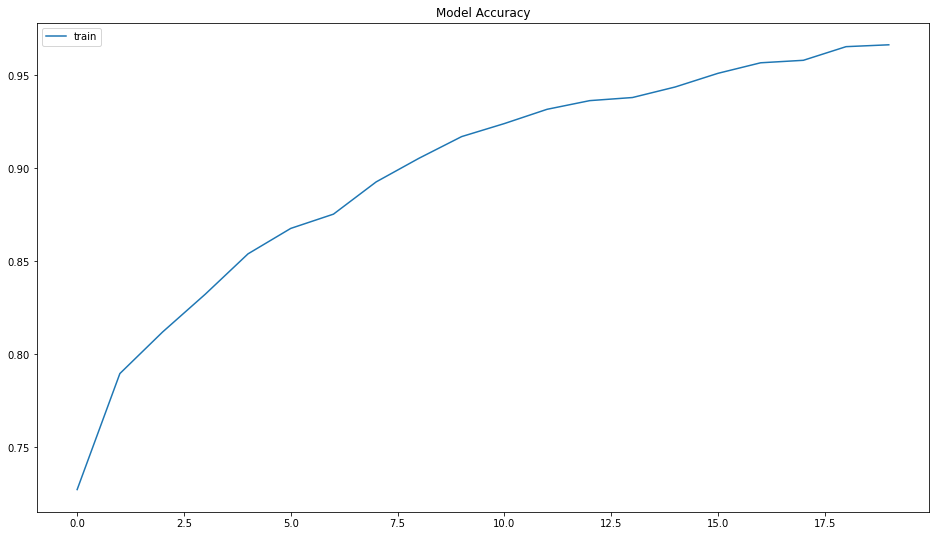

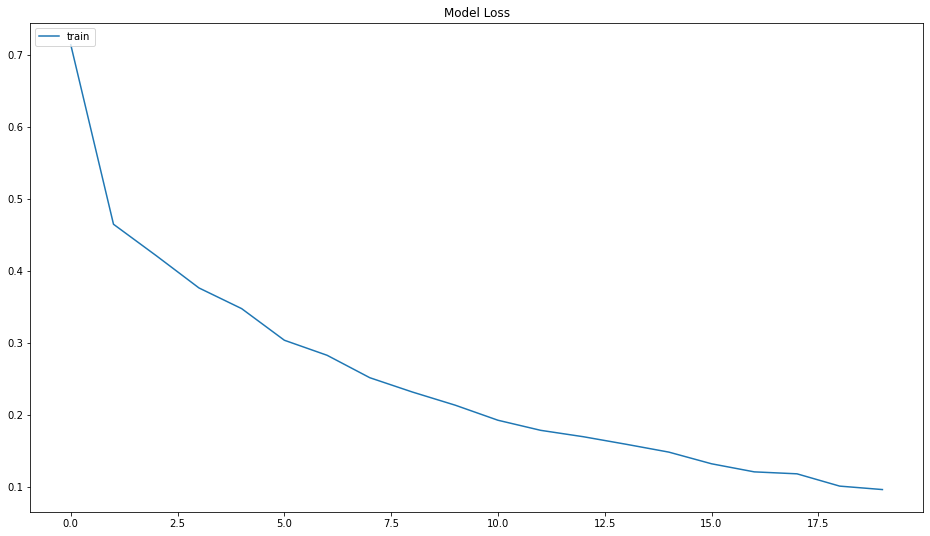

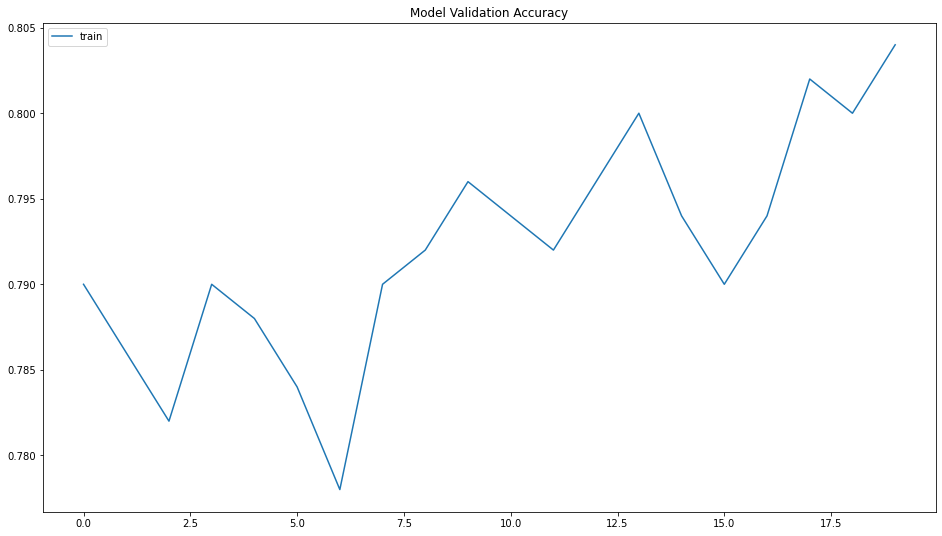

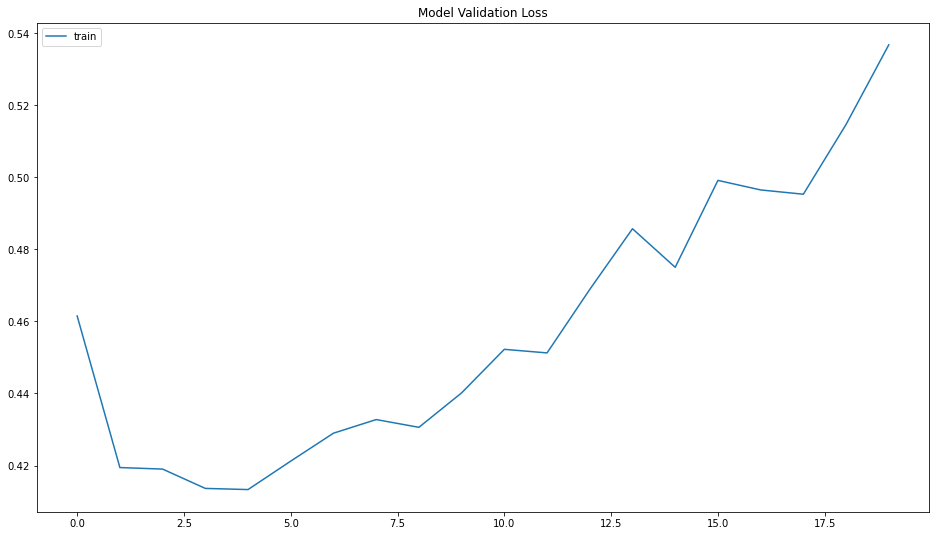

In [75]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [76]:
import seaborn as sns 
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(CATEGORIES)
ax.yaxis.set_ticklabels(CATEGORIES)

#This is the oneeeeeeeeeee

ValueError: Found input variables with inconsistent numbers of samples: [0, 500]

In [ ]:
##end

In [81]:
from sklearn.metrics import confusion_matrix
pred = res_model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

#pip install mlxtend



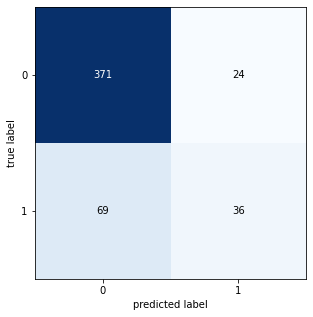

In [82]:

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [83]:
from mlxtend.plotting import plot_confusion_matrix

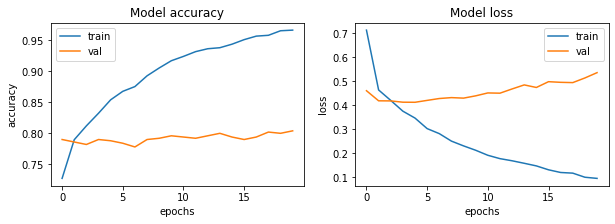

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
     
from sklearn.metrics import accuracy_score, confusion_matrix
preds = res_model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds))*100
#cm = confusion_matrix(y_test, np.round(preds))




In [ ]:
acc= 

In [85]:
tn, fp, fn, tp = CM.ravel()
preds = res_model.predict(X_test)
acc = accuracy_score(y_test, np.round(preds))*100
preds = res_model.predict(X_test)
from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX ------------------')
print(CM)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[371  24]
 [ 69  36]]

TEST METRICS ----------------------
Accuracy: 76.4%
Precision: 60.0%
Recall: 34.285714285714285%
F1-score: 43.63636363636363

TRAIN METRIC ----------------------
Train acc: 96.63
